In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

In [2]:
#setting directory path for dataset
Dataset = "data"
Data_dir = os.listdir(Dataset)
print(Data_dir)

['without_mask', 'with_mask']


In [3]:
#data preprocessing
img_rows,img_cols = 112,112

images = []
labels = [] 

for category in Data_dir:
  folder_path = os.path.join(Dataset,category)
  for img in os.listdir(folder_path):
    img_path = os.path.join(folder_path,img)
    img = cv2.imread(img_path)

    try:
      #converting image into gray scale
      grayscale_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

      #resizing gray scaled image into size 56x56
      resized_img =  cv2.resize(grayscale_img,(img_rows,img_cols))
      images.append(resized_img)
      labels.append(category)
    #Exception Handling
    except Exception as e:
      print("Exception Details : " + e)
images = np.array(images) /255.0
images = np.reshape(images,(images.shape[0],img_rows,img_cols,1))

#performing one hot encoding
lb = LabelBinarizer() 
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
labels = np.array(labels)

(train_X,test_X,train_y,test_y) = train_test_split(images,labels,test_size = 0.25,random_state= 0)

In [4]:
#Building CNN model via Sequential API
num_classes = 2
batch_size = 32
model = Sequential()

#First Layer
model.add(Conv2D(64,(3,3), input_shape = (img_rows,img_cols,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#Second Layer
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#Flatten and Dropout Layer
model.add(Flatten())
model.add(Dropout(0.5))

#Softmax Classifier
model.add(Dense(64,activation = "relu"))
model.add(Dense(num_classes,activation= "softmax"))

print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [5]:
"""
**Train the Model**"""
epochs = 50

model.compile(loss= 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(train_X,train_y,epochs = epochs,validation_split=0.25)


Epoch 1/50
25/25 [==============================] - 24s 365ms/step - loss: 1.0397 - accuracy: 0.4627 - val_loss: 0.6667 - val_accuracy: 0.6124
Epoch 2/50
25/25 [==============================] - 9s 353ms/step - loss: 0.6179 - accuracy: 0.7177 - val_loss: 0.4982 - val_accuracy: 0.7403
Epoch 3/50
25/25 [==============================] - 9s 359ms/step - loss: 0.4308 - accuracy: 0.8252 - val_loss: 0.3472 - val_accuracy: 0.8450
Epoch 4/50
25/25 [==============================] - 10s 385ms/step - loss: 0.3196 - accuracy: 0.8594 - val_loss: 0.3069 - val_accuracy: 0.8605
Epoch 5/50
25/25 [==============================] - 10s 388ms/step - loss: 0.2399 - accuracy: 0.9180 - val_loss: 0.2353 - val_accuracy: 0.8992
Epoch 6/50
25/25 [==============================] - 10s 384ms/step - loss: 0.1572 - accuracy: 0.9413 - val_loss: 0.2280 - val_accuracy: 0.9109
Epoch 7/50
25/25 [==============================] - 9s 371ms/step - loss: 0.1332 - accuracy: 0.9525 - val_loss: 0.2152 - val_accuracy: 0.9147
Ep

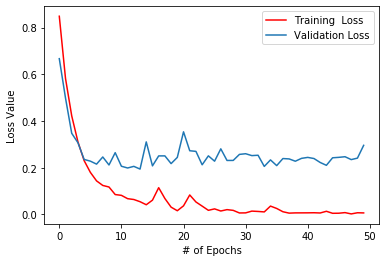

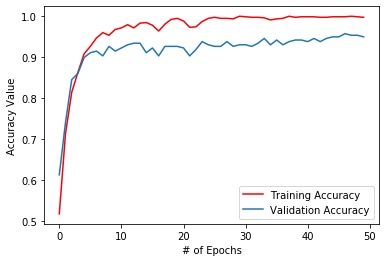

In [6]:
"""
**Plot the training loss and accuracy**
"""
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'r',label = "Training  Loss")
plt.plot(history.history['val_loss'],label = "Validation Loss")
plt.xlabel("# of Epochs")
plt.ylabel("Loss Value")
plt.legend()
plt.show()

#Plotting Accuracy
plt.plot(history.history['accuracy'],'r',label = "Training Accuracy")
plt.plot(history.history['val_accuracy'],label = "Validation Accuracy")
plt.xlabel("# of Epochs")
plt.ylabel("Accuracy Value")
plt.legend()
plt.show()

In [7]:
"""
Save the model
"""
model.save("New_Face_Mask_Model.h5")